# Анализ вакансий менеджеров проектов в IT

### Цели исследования
- Оценить объем рынка вакансий начинающих менеджеров проектов в IT
- Изучить спрос на джунов, мидлов, сеньоров, понять на сколько его покрывает рынок.
- Понять есть ли дефицит менеджеров проектов на рынке РФ и в какие сегменты чаще всего требуются начинающие менеджеры проектов
- Получить представление о портрете вакансий для дальнейшей проработки скилсета

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

In [2]:
#font = {'size'   : 16}

#matplotlib.rc('font', **font)

## 1. Загрузка и обработка данных

In [3]:
# Загрузка датасета в таблицу
vacancies = pd.read_csv('vacancies.csv', sep = "|")
vacancies.head()

,vacancy_id,vacancy_name,vacancy_description,experience_required,type_of_employment,work_schedule,publication_day,city_name,region_name,country_name,list_of_profarea_ids,list_of_skill_names
0,21861511,Project Manager,<p>We are looking for an experienced Project M...,above_6_years,full,full_day,2017-07-06 00:00:00.000,Москва,Москва,Россия,"12,1",[None]
1,23300837,Project Manager,<p>Adform provides a digital advertising solut...,up_to_6_years,full,full_day,2017-10-31 00:00:00.000,Минск,NaN,Беларусь,1,[None]
2,20084597,Project Manager,<p>Paymentwall is the San Francisco-based glob...,up_to_6_years,full,full_day,2017-04-28 00:00:00.000,Новосибирск,Новосибирская область,Россия,1,"['Управление проектами', 'Project management']"
3,19688824,Project manager (разработка сайтов),"<p>Сpa-партнерская сеть, которая занимается по...",up_to_6_years,full,full_day,2017-02-14 00:00:00.000,Москва,Москва,Россия,"1,3",[None]
4,23350509,Senior Project Manager,<p>​​​​​​The Senior Project Manager will be re...,above_6_years,full,full_day,2017-12-11 00:00:00.000,Санкт-Петербург,Санкт-Петербург,Россия,1,"['Английский язык', 'Business Analysis', 'Proj..."


In [4]:
# Просмотр информации о таблице
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   vacancy_id            9690 non-null   int64 
 1   vacancy_name          9690 non-null   object
 2   vacancy_description   9690 non-null   object
 3   experience_required   9690 non-null   object
 4   type_of_employment    9690 non-null   object
 5   work_schedule         9690 non-null   object
 6   publication_day       9690 non-null   object
 7   city_name             9690 non-null   object
 8   region_name           8499 non-null   object
 9   country_name          9690 non-null   object
 10  list_of_profarea_ids  9690 non-null   object
 11  list_of_skill_names   9690 non-null   object
dtypes: int64(1), object(11)
memory usage: 908.6+ KB


In [5]:
# Проверим на наличие дубликатов
vacancies.duplicated().mean()

0.0

Дубликатов в данных не выявлено. Пропуски имеются в столбце 'region_name'.

In [6]:
#Посмотрим в каких записях есть пропуски в столбце region_name
vacancies[vacancies['region_name'].isna()]['city_name'].value_counts()

Минск               731
Алматы              196
Нур-Султан          119
Атырау               23
Гродно               20
Караганда            16
Гомель               12
Могилев              12
Витебск              11
Брест                 9
Шымкент               5
Кокшетау              4
Костанай              4
Актау                 4
Семей                 3
Кызылорда             2
Петропавловск         2
Полоцк                2
Темиртау              2
Актобе                2
Павлодар              1
Мозырь                1
Жодино                1
Усть-Каменогорск      1
Жезказган             1
Сатпаев               1
Уральск               1
Сморгонь              1
Бобруйск              1
Барановичи            1
Молодечно             1
Борисов               1
Name: city_name, dtype: int64

Пропуски относятся к вакансиям стран СНГ, для данного исследования пока не критично.

In [7]:
vacancies['publication_day']

0       2017-07-06 00:00:00.000
1       2017-10-31 00:00:00.000
2       2017-04-28 00:00:00.000
3       2017-02-14 00:00:00.000
4       2017-12-11 00:00:00.000
                 ...           
9685    2019-10-28 00:00:00.000
9686    2019-09-23 00:00:00.000
9687    2019-07-09 00:00:00.000
9688    2019-04-26 00:00:00.000
9689    2019-12-06 00:00:00.000
Name: publication_day, Length: 9690, dtype: object

In [8]:
# Приведем столбец с датой размещения вакансии в формат даты
vacancies['publication_day'] = pd.to_datetime(vacancies['publication_day'], format = '%Y-%m-%d')
vacancies['publication_year'] = vacancies['publication_day'].dt.year

In [9]:
vacancies.head(3)

,vacancy_id,vacancy_name,vacancy_description,experience_required,type_of_employment,work_schedule,publication_day,city_name,region_name,country_name,list_of_profarea_ids,list_of_skill_names,publication_year
0,21861511,Project Manager,<p>We are looking for an experienced Project M...,above_6_years,full,full_day,2017-07-06,Москва,Москва,Россия,"12,1",[None],2017
1,23300837,Project Manager,<p>Adform provides a digital advertising solut...,up_to_6_years,full,full_day,2017-10-31,Минск,NaN,Беларусь,1,[None],2017
2,20084597,Project Manager,<p>Paymentwall is the San Francisco-based glob...,up_to_6_years,full,full_day,2017-04-28,Новосибирск,Новосибирская область,Россия,1,"['Управление проектами', 'Project management']",2017


In [10]:
vacancies['publication_day'].min()

Timestamp('2017-01-02 00:00:00')

In [11]:
vacancies['publication_day'].max()

Timestamp('2019-12-31 00:00:00')

Мы рассматриваем данные за 3 года (период с 1 января 2017 по 31 декабря 2019).

In [12]:
# Приведем названия вакансий к строчному написанию, посчитаем количество различных вариантов названий
vacancies['vacancy_name'] = vacancies['vacancy_name'].str.lower()
vacancies_count = vacancies['vacancy_name'].value_counts()
vacancies['vacancy_name'] = vacancies['vacancy_name'].str.lower()
vacancies_count.head(10)

руководитель проекта                   1225
менеджер проекта                       1143
project manager                        1008
администратор проекта                   299
it project manager                      125
junior project manager                   94
помощник руководителя проектов           73
менеджер проектов / project manager      67
senior project manager                   66
менеджер проектов (project manager)      44
Name: vacancy_name, dtype: int64

Все вакансии являются вариациями на тему "менеджер проекта"

### Выводы по загрузке и обработке данных

- У нас 9690 записей в 12 столбцах
- Мы рассматриваем данные за 3 года (период с 1 января 2017 по 31 декабря 2019)
- Дубликатов в данных не выявлено. Пропуски имеются в столбце 'region_name'
- Пропуски относятся к вакансиям стран СНГ, для данного исследования не критично
- Все вакансии являются вариациями на тему "менеджер проекта"

In [13]:
# Функция определения принадлежности к профобласти
def prof_area(data):
    if '1' in data:
        return 'Информационные технологии, интернет, телеком'
    else:
        if '3' in data:
            return 'Маркетинг, реклама, PR'
    return 'undefined'

In [14]:
# Применим функцию к столбцу 'list_of_profarea_ids'
vacancies['prof_area'] = vacancies['list_of_profarea_ids'].apply(prof_area)

In [15]:
# Посчитаем значения по полученным профобластям
vacancies['prof_area'].value_counts()

Информационные технологии, интернет, телеком    9675
Маркетинг, реклама, PR                            15
Name: prof_area, dtype: int64

У нас 15 вакансий, которые не относятся к it (по крайней мере, так их охарактеризовал работодатель)

Я пользовался справочником профобластей из API hh.ru:
https://api.hh.ru/specializations

In [16]:
it_vacancies = vacancies[vacancies['prof_area'] != 'Маркетинг, реклама, PR'].copy()

## 2. Исследовательский анализ вакансий

1. Портрет вакансии
    - самые частые требования и задачи
    - выделить наиболее популярные сегменты / группы вакансий
2. Выделить наиболее популярные сегменты компаний, в которые требуются начинающие менеджеры проектов. Изучить популярные сегменты в динамике за последние 3 года
3. Анализ креативности вакансий. Как вакансии изменялись со временем?

### Распределение вакансий на джунов, мидлов и сениоров

In [17]:
# функция категоризации ваканисий на джунов, мидлов и сениоров
def grade_vacancy (data):
    if ('junior' in data) or ('cтажёр' in data) or ('cтажер' in data):
        return 'junior'
    if ('мидл' in data) or ('middle' in data):
        return 'middle'
    if ('senior' in data) or ('старший' in data) or ('ведущий' in data):
        return 'senior'
    return 'undefined'

In [18]:
it_vacancies['vacancy_grade'] = it_vacancies['vacancy_name'].apply(grade_vacancy)

In [19]:
# Посмотрим количество грейдов в вакансиях
it_vacancies['vacancy_grade'].value_counts()

undefined    9125
senior        288
junior        244
middle         18
Name: vacancy_grade, dtype: int64

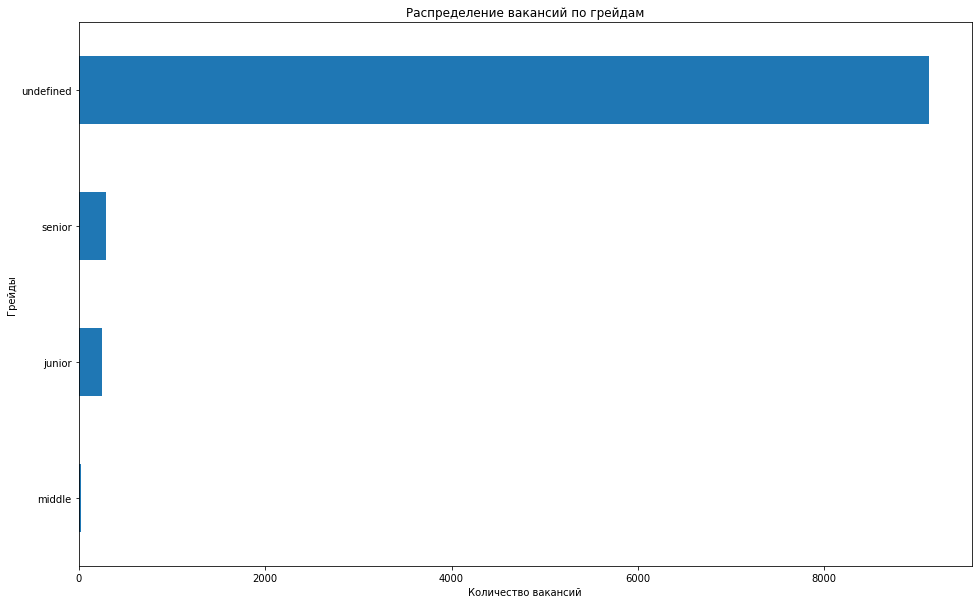

In [20]:
it_vacancies['vacancy_grade'].value_counts(ascending = True).plot(kind = 'barh', 
                                              title = 'Распределение вакансий по грейдам',
                                              figsize = (16, 10))
plt.xlabel('Количество вакансий')
plt.ylabel('Грейды')
plt.show()

В представленных вакансиях джунов и сениоров примерно поровну (244 и 288), мидлов очень мало - 18. Однако в большинстве случаев грейд не указан, что не дает возможности адекватно оценить соотношение грейдов в данной выборке.

Можно, однако провести грейдинг по данным о требуемом опыте работы.

In [21]:
# Посчитаем варианты требуемого опыта в вакансиях
it_vacancies['experience_required'].value_counts()

up_to_3_years    4496
up_to_6_years    3818
no_experience     694
above_6_years     667
Name: experience_required, dtype: int64

Можно принять следующие критерии для грейдинга:
- no_experience - **джун**
- up_to_3_years - **мидл**
- up_to_6_years - **сениор**
- above_6_years - по большому счету это тимлид, но можно приравнять его к сениору в данном контексте

In [22]:
# Напишем новую функцию грейдинга
def new_grades (data):
    if data == 'no_experience':
        return 'junior'
    if data == 'up_to_3_years':
        return 'middle'
    return 'senior'

In [23]:
# Применим функцию к столбцу 'experience_required'
it_vacancies['new_grades'] = it_vacancies['experience_required'].apply(new_grades)

In [24]:
# Посмотрим новое количество грейдов в вакансиях
new_grades = it_vacancies['new_grades'].value_counts()
new_grades

middle    4496
senior    4485
junior     694
Name: new_grades, dtype: int64

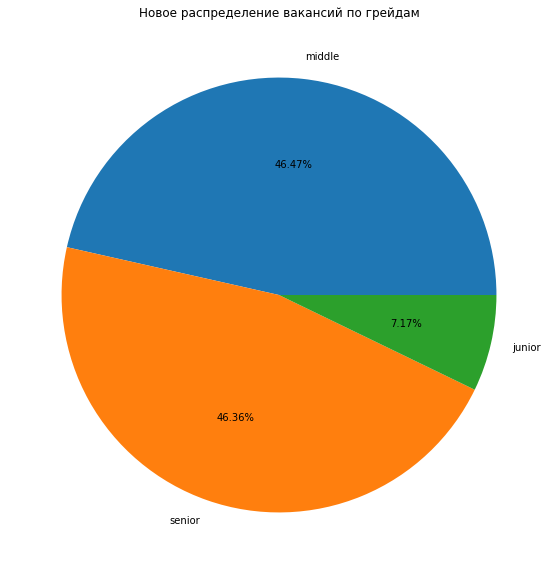

In [25]:
plt.figure(figsize = (10,10))
values = new_grades 
labels = ['middle', 'senior', 'junior'] 
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Новое распределение вакансий по грейдам')
#plt.savefig('plot_1.png', dpi = 100)
plt.show()

Здесь уже картина более адекватная - на рынке требуются в основном опытные специалисты, мидлы и сениоры - примерно поровну (4502 и 4492).

Джунов требуется совсем немного - 696 или 7,18%.

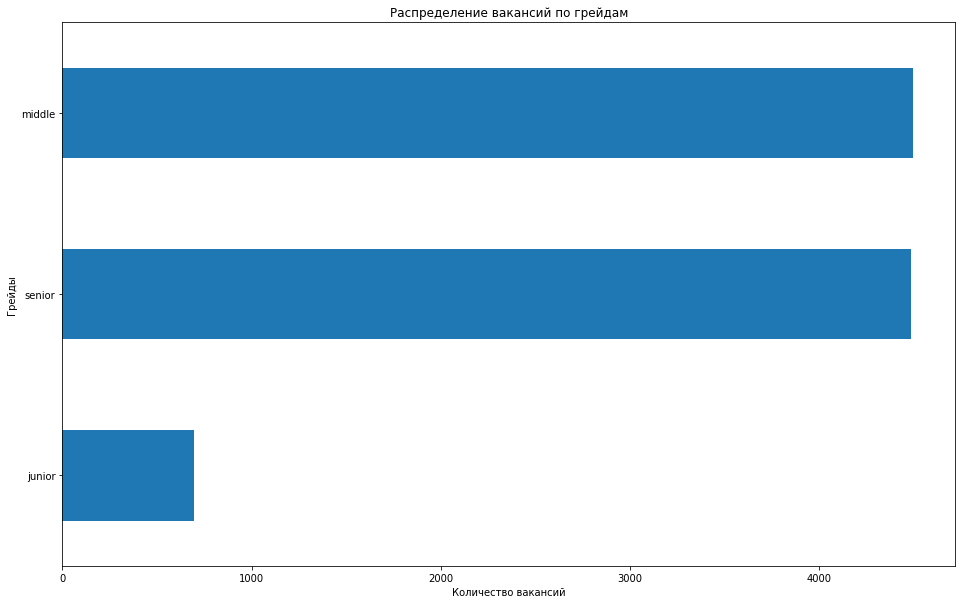

In [26]:
# График с горизонтальными барами
new_grades.sort_values().plot(kind = 'barh',
                              title = 'Распределение вакансий по грейдам',
                              figsize = (16, 10))
plt.xlabel('Количество вакансий')
plt.ylabel('Грейды')
plt.show()

In [27]:
# Выделим вакансии для джунов в отдельную таблицу
jun_vacancies = it_vacancies[it_vacancies['new_grades'] == 'junior']
jun_vacancies.head(3)

,vacancy_id,vacancy_name,vacancy_description,experience_required,type_of_employment,work_schedule,publication_day,city_name,region_name,country_name,list_of_profarea_ids,list_of_skill_names,publication_year,prof_area,vacancy_grade,new_grades
12,23149744,руководитель проекта / руководитель проектного...,<p><strong>Обязанности:</strong></p> <ul> <li>...,no_experience,full,full_day,2017-10-18,Красноярск,Красноярский край,Россия,"12,1,20",[None],2017,"Информационные технологии, интернет, телеком",undefined,junior
39,19978398,менеджер проекта,<p><strong>Обязанности</strong>:</p> <ul> <li>...,no_experience,full,flexible,2017-03-20,Минск,NaN,Беларусь,"12,17,1,20",[None],2017,"Информационные технологии, интернет, телеком",undefined,junior
40,19489484,project manager,<strong>Обязанности:</strong> <ul> <li>Встречи...,no_experience,full,full_day,2017-01-24,Тюмень,Тюменская область,Россия,"1,17","['Навыки продаж', 'Активные продажи', 'B2B Про...",2017,"Информационные технологии, интернет, телеком",undefined,junior


### Портрет вакансии джуниор менеджер проектов

In [28]:
# Посмотрим требумые навыки на вакансию джуна
list_of_skill_names = jun_vacancies['list_of_skill_names']
jun_good_skills = list_of_skill_names[list_of_skill_names != '[None]']
jun_good_skills

40      ['Навыки продаж', 'Активные продажи', 'B2B Про...
46      ['Яндекс.Метрика', 'E-Mail Marketing', '1С-Бит...
76      ['Чтение электросхем', 'Производство строитель...
161     ['Ведение переговоров', 'Техническая документа...
269     ['Целеустремленность', 'Коммуникабельность', '...
                              ...                        
9552    ['Телефонные переговоры', 'Анализ посещаемости...
9562    ['Битрекс24', '1С-Битрикс', 'Управление проект...
9590    ['SQL', 'Организаторские навыки', 'Управление ...
9608    ['JIRA', 'Confluence', 'баг-трекинговыми', 'up...
9656    ['Управление проектами', 'Разработка техническ...
Name: list_of_skill_names, Length: 285, dtype: object

In [29]:
# Импортируем библиотеку PyMystem
from pymystem3 import Mystem
m = Mystem()

In [30]:
# Проведем лемматизацию
text_string = jun_good_skills.str.cat(sep = ',')
lemmas = m.lemmatize(text_string)

In [31]:
# Импортируем счетчик и посмотрим наиболее часто встречающиеся леммы
from collections import Counter
c = Counter(lemmas)
c.most_common()

[(' ', 2151),
 ("', '", 1830),
 ("'],['", 282),
 ('управление', 243),
 ('проект', 182),
 ('деловой', 139),
 ('-', 117),
 ('навык', 116),
 ('работа', 108),
 ('переговоры', 102),
 ('команда', 102),
 ('ведение', 94),
 ('в', 87),
 ('язык', 79),
 ('MS', 78),
 ('продажа', 76),
 ('Project', 68),
 ('английский', 67),
 ('организаторский', 66),
 ('переписка', 61),
 ('интернет', 55),
 ('грамотный', 54),
 ('речь', 54),
 ('презентация', 54),
 ('персонал', 46),
 ('коммуникация', 45),
 ('и', 40),
 ('management', 40),
 ('общение', 40),
 ('с', 35),
 ('проектный', 34),
 ('менеджмент', 34),
 ('пользователь', 29),
 ('пк', 29),
 ('1С', 27),
 ('бизнес', 27),
 ('Management', 27),
 ('клиент', 26),
 ('на', 26),
 ('анализ', 26),
 ('Excel', 25),
 ('проведение', 25),
 ('информация', 25),
 ('Google', 24),
 ('телефонный', 23),
 ('Agile', 23),
 ('руководство', 21),
 ('.', 20),
 ('коллектив', 20),
 ('система', 20),
 ('оптимизация', 20),
 ('разработка', 20),
 ('маркетинг', 20),
 ('развитие', 20),
 ('яндекс', 19),
 ('о

Исходя из наиболее популярных требуемых навыков для вакансий джунов, наиболее востребованы скорее софт-скиллы:
- работа в команде
- ведение переговоров
- деловая переписка
- продажи
- организаторские навыки
- грамотная речь
- коммуникация

Что касается хард-скиллов, они играют меньшую роль и наиболее востребованными являются:
- MS Project
- 1C
- Excel
- Битрикс
- Google Analytics
- HTML

In [32]:
jun_vacancies['list_of_skill_names']

12                                                 [None]
39                                                 [None]
40      ['Навыки продаж', 'Активные продажи', 'B2B Про...
46      ['Яндекс.Метрика', 'E-Mail Marketing', '1С-Бит...
69                                                 [None]
                              ...                        
9608    ['JIRA', 'Confluence', 'баг-трекинговыми', 'up...
9640                                               [None]
9652                                               [None]
9656    ['Управление проектами', 'Разработка техническ...
9678                                               [None]
Name: list_of_skill_names, Length: 694, dtype: object

In [33]:
# Уберем квадратные скобки слева и справа
jun_vacancies['list_of_skill_names'] = jun_vacancies['list_of_skill_names'].str.lstrip('[')
jun_vacancies['list_of_skill_names'] = jun_vacancies['list_of_skill_names'].str.rstrip(']')

In [34]:
# Соберем все скиллы в отдельную табличку
skills = jun_vacancies['list_of_skill_names'].str.split(',', expand = True)

In [35]:
# Сгруппируем и посчитаем все требуемые навыки
skill_count = pd.Series()
for column in skills:
    skill_count = skill_count.append(skills[column].value_counts())


In [36]:
# Отсортируем по убыванию навыки и посмотрим наиболее часто встречающиеся
skill_count.sort_values(ascending = False).head(25)

None                         409
'Управление проектами'        24
 'Управление проектами'       23
 'Управление проектами'       20
 'Управление проектами'       17
'Английский язык'             14
 'Английский язык'            14
 'Английский язык'            14
 'Работа в команде'           12
'Ведение переговоров'         11
 'Ведение переговоров'        11
 'Управление проектами'       11
 'Работа в команде'           11
 'Работа в команде'           10
 'Организаторские навыки'     10
'Грамотная речь'               9
 'Ведение переговоров'         9
 'Управление проектами'        9
'Project management'           9
 'Организаторские навыки'      9
 'Английский язык'             8
 'Организаторские навыки'      8
'Работа в команде'             8
 'Управление проектами'        8
 'Работа в команде'            8
dtype: int64

По результатам нового анализа востребованных навыков, первые места занимают:
- управление проектами
- английский язык
- работа в команде
- ведение переговоров
- организаторские навыки
- грамотная речь

### Емкость рынка вакансий в динамике

In [37]:
# Посчитаем количество вакансий для джунов по годам
jun_vacancies_by_year = jun_vacancies.groupby('publication_year')['vacancy_id'].count()
jun_vacancies_by_year = pd.DataFrame(jun_vacancies_by_year)
jun_vacancies_by_year.columns = ['junior_vacancies']
jun_vacancies_by_year.index.name = 'year'

In [38]:
# Посчитаем количество вакансий для мидлов по годам
middle_vacancies = it_vacancies[it_vacancies['new_grades'] == 'middle']
middle_vacancies_by_year = middle_vacancies.groupby('publication_year')['vacancy_id'].count()
middle_vacancies_by_year = pd.DataFrame(middle_vacancies_by_year)
middle_vacancies_by_year.columns = ['middle_vacancies']
middle_vacancies_by_year.index.name = 'year'

In [39]:
# Посчитаем количество вакансий для сениоров по годам
senior_vacancies = it_vacancies[it_vacancies['new_grades'] == 'senior']
senior_vacancies_by_year = senior_vacancies.groupby('publication_year')['vacancy_id'].count()
senior_vacancies_by_year = pd.DataFrame(senior_vacancies_by_year)
senior_vacancies_by_year.columns = ['senior_vacancies']
senior_vacancies_by_year.index.name = 'year'

In [40]:
# Соберем все в одну таблицу
total_vacancies_by_year = jun_vacancies_by_year.join(middle_vacancies_by_year)
total_vacancies_by_year = total_vacancies_by_year.join(senior_vacancies_by_year)
total_vacancies_by_year

,junior_vacancies,middle_vacancies,senior_vacancies
year,,,
2017,252,1663,1670
2018,215,1499,1504
2019,227,1334,1311


In [41]:
grade_vacancies_by_year = it_vacancies.pivot_table(index = 'publication_year',
                        columns = 'new_grades', 
                        values = 'vacancy_id',
                        aggfunc = 'count')
grade_vacancies_by_year

new_grades,junior,middle,senior
publication_year,,,
2017,252,1663,1670
2018,215,1499,1504
2019,227,1334,1311


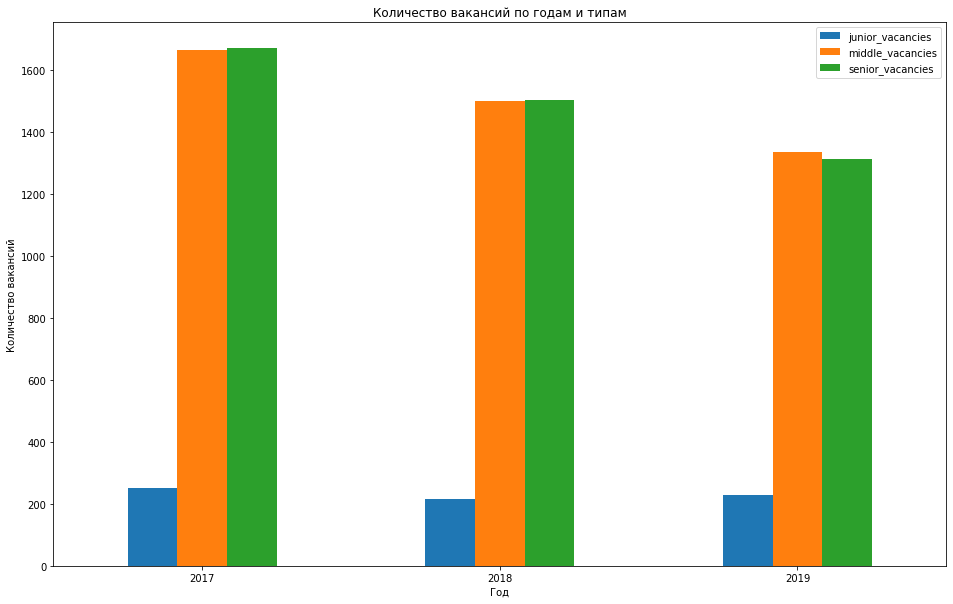

In [42]:
# Построим график динамики количества вакансий по годам
total_vacancies_by_year.plot(kind = 'bar', rot = 0, title = 'Количество вакансий по годам и типам', 
                      figsize = (16, 10))
plt.xlabel('Год')
plt.ylabel('Количество вакансий')
#plt.savefig('plot_2.png', dpi = 100)
plt.show()

Все три сегмента вакансий (джуны, мидлы, сениоры) показывают отрицательную динамику по годам. Не думаю, что причина в насыщении рынка, скорее это отражение ухудшения экономической ситуации в целом.

### Емкость рынка вакансий по регионам и по годам

In [43]:
# Посчитаем распределение вакансий по регионам и годам
vacancies_by_region_year = vacancies.groupby(['region_name', 'publication_year'])['vacancy_id'].count().to_frame()
vacancies_by_region_year = vacancies_by_region_year.sort_values(by = 'vacancy_id', ascending = False)
vacancies_by_region_year.columns = ['vacancies']

In [44]:
vacancies_by_region_year.head(10)

vacancies
region_name           publication_year           
Москва                2017                   1565
                      2018                   1408
                      2019                   1246
Санкт-Петербург       2017                    457
                      2018                    378
                      2019                    372
Новосибирская область 2017                    100
                      2018                     98
Свердловская область  2018                     93
Республика Татарстан  2019                     77

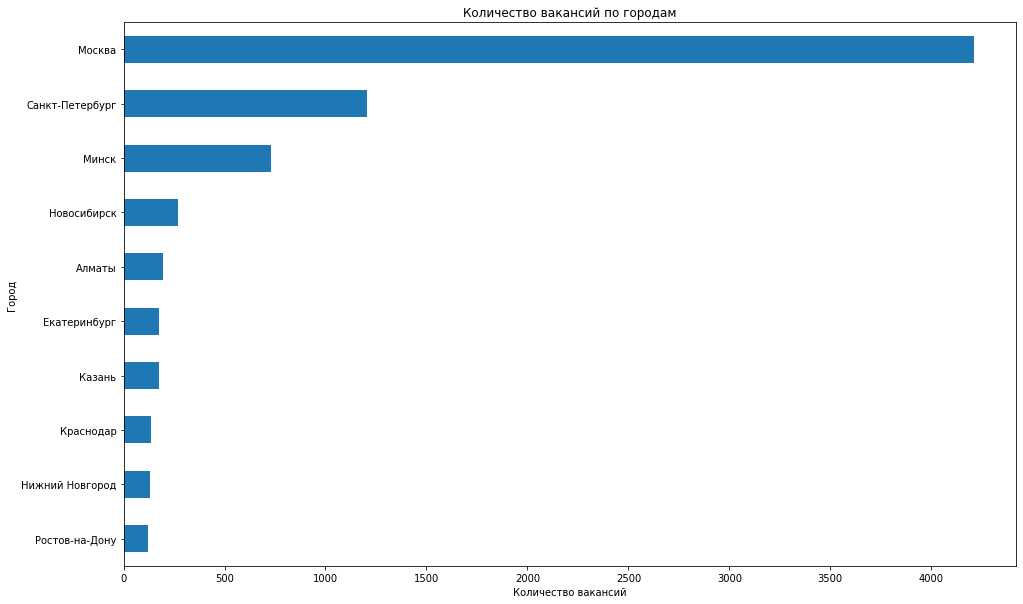

In [45]:
city_vac = it_vacancies.groupby('city_name')['vacancy_id'].count()
city_vac = city_vac.sort_values(ascending = False).head(10)
city_vac.sort_values(ascending = True).plot(kind = 'barh',
                                           figsize = (16,10),
                                           title = 'Количество вакансий по городам')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.show()

- Основные вакансии в рассматриваемой сфере расположены в Москве и Санкт-Петербурге.
- Количество вакансий в Москве, превышает количество вакансий в Санкт-Петербурге в 3 раза.
- В остальных регионах ежегодно публикуется менее 100 вакансий.

In [46]:
# Посчитаем количество вакансий по грейдам и типам занятости
employment_type = it_vacancies.groupby('new_grades')['type_of_employment'].value_counts()
employment_type = employment_type.to_frame()
employment_type.columns = ['vacancies']
employment_type = employment_type

In [47]:
employment_type

vacancies
new_grades type_of_employment           
junior     full                      633
           part                       29
           project                    16
           probation                  13
           volonteer                   3
middle     full                     4370
           project                    83
           part                       43
senior     full                     4393
           project                    72
           part                       20

Большинство вакансий для всех грейдов подразумевает полную занятость, далее -  проектная работа, совсем мало вакансий с частичной занятостью.

Среди вакансий для джунов совсем немного - 13 это стажировка.

In [48]:
# Выделим вакансии с удаленкой
remote_vacancies = it_vacancies[vacancies['work_schedule'] == 'remote']

### Распределение по регионам и количество вакансий с удаленной работой

In [49]:
# Посчитаем распределение вакансий с удаленкой по городам
remote_by_cities = remote_vacancies.groupby('city_name')['vacancy_id'].count().sort_values()
remote_by_cities = remote_by_cities.tail(10)
remote_by_cities

city_name
Воронеж              6
Уфа                  7
Симферополь          7
Нижний Новгород      8
Екатеринбург        11
Казань              12
Новосибирск         13
Минск               16
Санкт-Петербург     46
Москва             118
Name: vacancy_id, dtype: int64

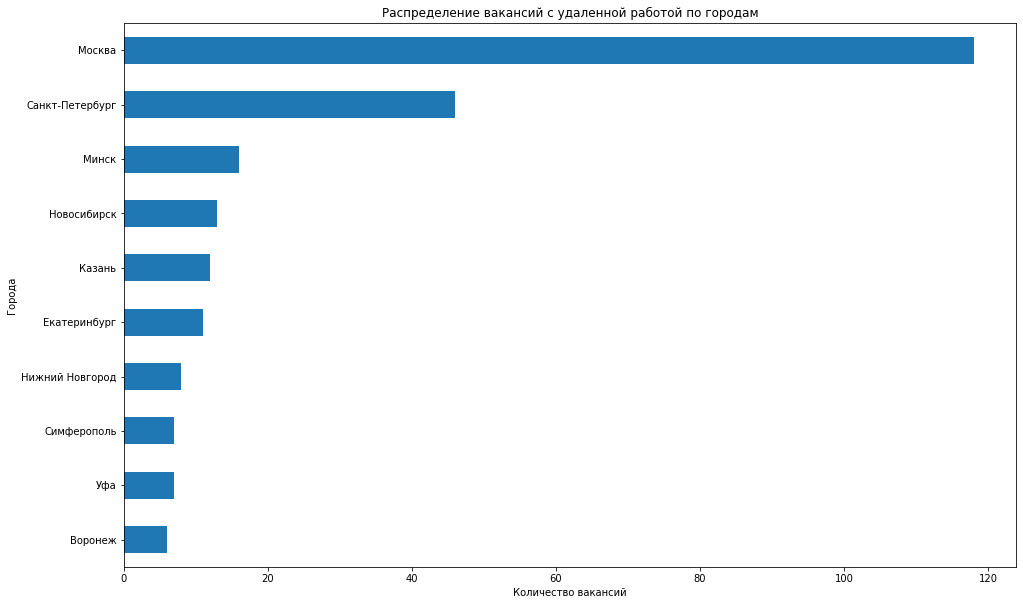

In [50]:
# Построим график количества вакансий с удаленкой по городам
remote_by_cities.plot(kind = 'barh', figsize = (16, 10),
                     title = 'Распределение вакансий с удаленной работой по городам')
plt.ylabel('Города')
plt.xlabel('Количество вакансий')
#plt.savefig('plot_3.png', dpi = 100)
plt.show()

Больше всего вакансий с удаленной работой в Москве - 118, затем в Санкт-Петербурге - 46, на третьем месте Минск - 16.

In [51]:
# Посчитаем распределение вакансий с удаленкой по грейдам
remote_by_grades = remote_vacancies.groupby('new_grades')['vacancy_id'].count().sort_values()
remote_by_grades

new_grades
junior     28
senior    133
middle    183
Name: vacancy_id, dtype: int64

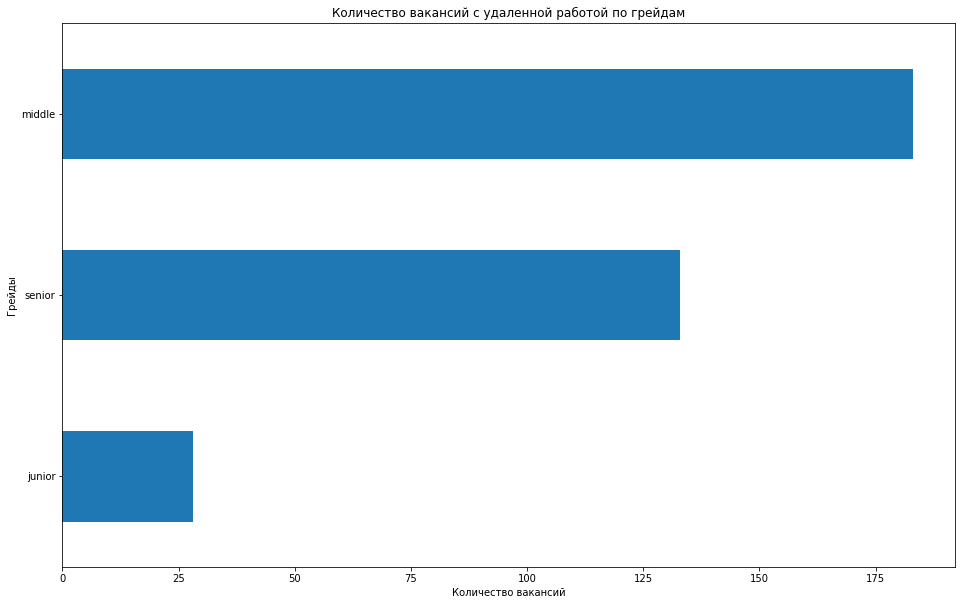

In [52]:
# Построим график количества вакансий с удаленкой по грейдам
remote_by_grades.plot(kind = 'barh', figsize = (16, 10),
                     title = 'Количество вакансий с удаленной работой по грейдам')
plt.ylabel('Грейды')
plt.xlabel('Количество вакансий')
#plt.savefig('plot_4.png', dpi = 100)
plt.show()

Больше всего вакансий на удаленке для мидлов - 183, для сениоров - 133 и совсем мало для джунов - 28. Это понятно, сначала им надо обучиться в офисе.

### Существуют ли сезонные пики и спады в распределении числа активных вакансий в течение года (применительно к городам)?

In [53]:
# Добавим столбец с месяцем публикации вакансии
it_vacancies['publication_month'] = it_vacancies['publication_day'].dt.month

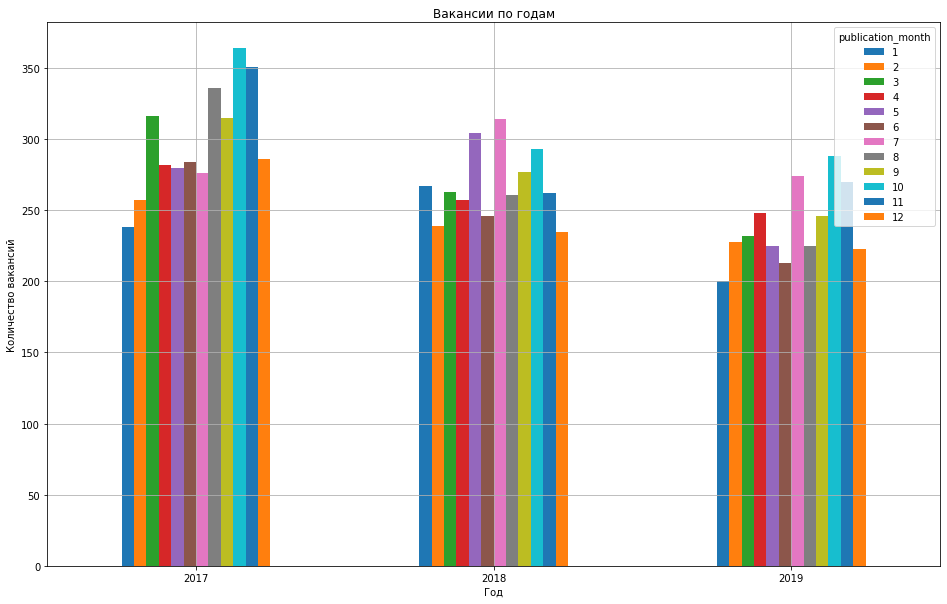

In [54]:
# Сведем данные в сводную таблицу и нарисуем график количества вакансий по годам и месяцам
vacancies_pivot = it_vacancies.pivot_table(index = 'publication_year', 
                                                 columns = 'publication_month',
                                                 values = 'vacancy_id', aggfunc = 'count')
vacancies_pivot.plot(kind = 'bar', grid = True, figsize = (16, 10),
                           title = 'Вакансии по годам', rot = 0)
plt.xlabel('Год')
plt.ylabel('Количество вакансий')
plt.savefig('plot_5.png', dpi = 100)
plt.show()

In [55]:
vacancies_pivot = vacancies_pivot.T

In [56]:
vacancies_pivot

publication_year,2017,2018,2019
publication_month,,,
1,238,267,200
2,257,239,228
3,316,263,232
4,282,257,248
5,280,304,225
6,284,246,213
7,276,314,274
8,336,261,225
9,315,277,246


In [57]:
data_to_plot = [vacancies_pivot[2017],
                vacancies_pivot[2018],
                vacancies_pivot[2019]]

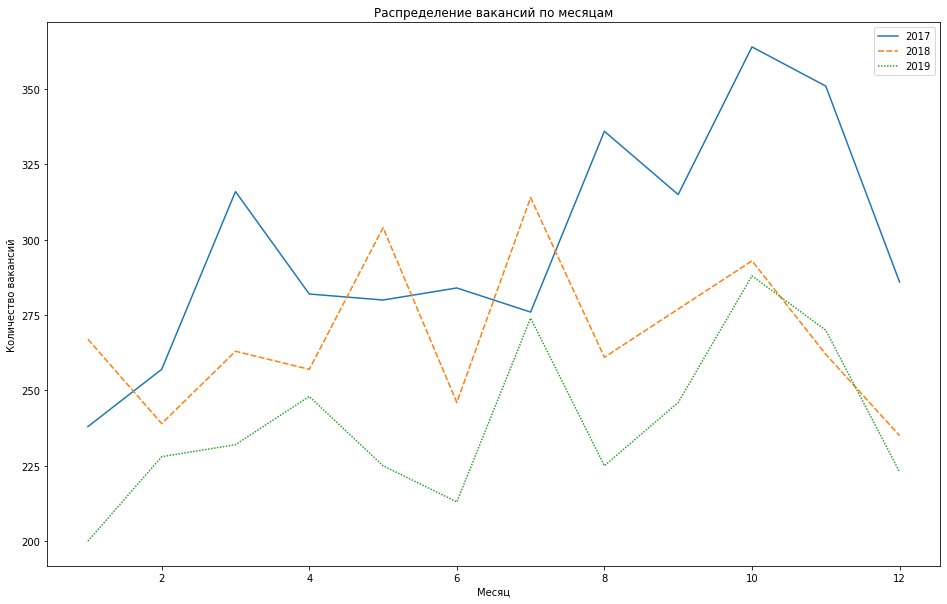

In [58]:
plt.figure(figsize = (16, 10))
sns.lineplot(data = data_to_plot)

plt.title('Распределение вакансий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.show()

Прослеживается тенденция роста публикаций после декабрьского-январского спада, летом небольшой спад (за исключением 2018 года), затем рост в сентябре, октябре, ноябре.

In [59]:
# Посчитаем количество вакансий в разбивке по месяцам публикаций в нескольких городах выборочно
mow_vac = it_vacancies[it_vacancies['city_name'] == 'Москва']
mow_vacancies_pivot = mow_vac.pivot_table(columns = 'publication_month', values = 'vacancy_id', aggfunc = 'count')
#mow_vacancies_pivot.plot(kind = 'bar', grid = True, figsize = (16, 9),
#                           title = 'Вакансии по месяцам в Москве', rot = 0)
#plt.xlabel('Месяц')
#plt.ylabel('Количество вакансий')
#plt.show()

In [60]:
spb_vac = it_vacancies[it_vacancies['city_name'] == 'Санкт-Петербург']
spb_vacancies_pivot = spb_vac.pivot_table(columns = 'publication_month',values = 'vacancy_id', aggfunc = 'count')
#spb_vacancies_pivot.plot(kind = 'bar', grid = True, figsize = (16, 9),
#                           title = 'Вакансии по месяцам в Санкт-Петербурге', rot = 0)
#plt.xlabel('Месяц')
#plt.ylabel('Количество вакансий')
#plt.show()

In [61]:
vor_vac = it_vacancies[it_vacancies['city_name'] == 'Воронеж']
vor_vacancies_pivot = vor_vac.pivot_table(columns = 'publication_month', values = 'vacancy_id', aggfunc = 'count')
#vor_vacancies_pivot.plot(kind = 'bar', grid = True, figsize = (16, 9),
#                           title = 'Вакансии по месяцам в Воронеже', rot = 0)
#plt.xlabel('Месяц')
#plt.ylabel('Количество вакансий')
#plt.show()

In [62]:
min_vac = it_vacancies[it_vacancies['city_name'] == 'Минск']
min_vacancies_pivot = min_vac.pivot_table(columns = 'publication_month', values = 'vacancy_id', aggfunc = 'count')
#min_vacancies_pivot.plot(kind = 'bar', grid = True, figsize = (16, 9),
#                           title = 'Вакансии по месяцам в Минске', rot = 0)
#plt.xlabel('Месяц')
#plt.ylabel('Количество вакансий')
#plt.show()

In [63]:
mow_vacancies_pivot = mow_vacancies_pivot.T
spb_vacancies_pivot = spb_vacancies_pivot.T
vor_vacancies_pivot = vor_vacancies_pivot.T
min_vacancies_pivot = min_vacancies_pivot.T

In [64]:
all_cities_vac = mow_vacancies_pivot.join(spb_vacancies_pivot, lsuffix='_mow', rsuffix='_spb')\
.join(vor_vacancies_pivot, rsuffix='_vor').join(min_vacancies_pivot, lsuffix = '_vor', rsuffix='_min')
all_cities_vac

,vacancy_id_mow,vacancy_id_spb,vacancy_id_vor,vacancy_id_min
publication_month,,,,
1,285,77,8,61
2,333,63,7,52
3,376,102,4,52
4,329,102,9,64
5,321,97,8,68
6,334,99,9,56
7,372,105,10,68
8,351,116,11,58
9,371,89,9,72


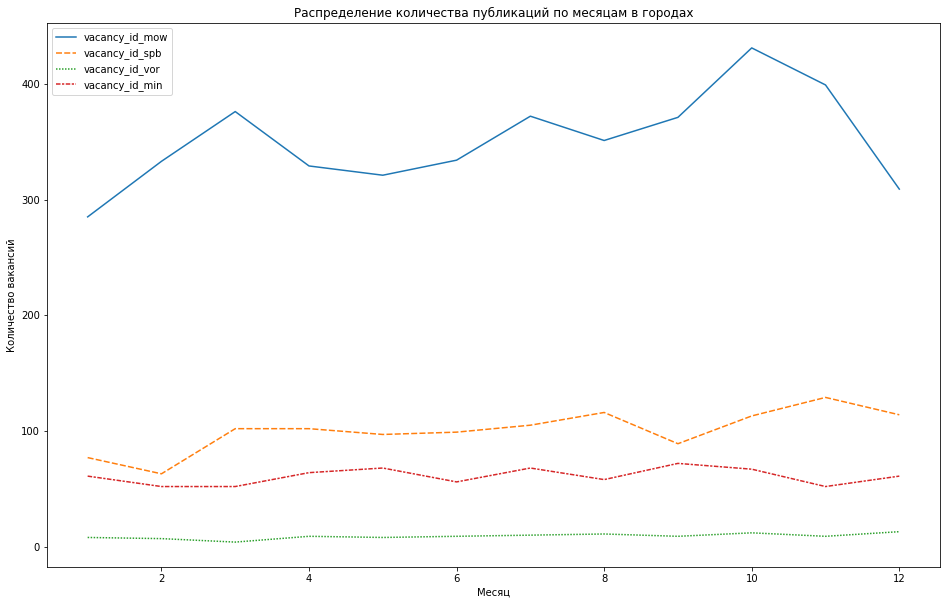

In [65]:
plt.figure(figsize = (16, 10))
sns.lineplot(data = all_cities_vac)

plt.title('Распределение количества публикаций по месяцам в городах')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.show()

В сезонности прослеживается общая тенденция по выбранным городам - рост весной и концу года. Самые активные месяцы - октябрь, ноябрь - это в Российских городах.

Что касается Минска - январь и декабрь там тоже активные месяцы, что возможно связано с меньшим количеством новогодних праздников в Республике Беларусь.

### Есть ли дефицит на рынке таких специалистов?

Согласно исследованию портала HeadHunter (https://stats.hh.ru/moscow#resumes%5Bactive%5D=true&resumes%5Bprofarea%5D=1&resumes%5Bperiod%5D=year&dynamicVacancies%5Bactive%5D=true&dynamic-vacancies%5Bdynamic-vacancies%5D=year), за последние пару лет налицо снижение количества вакансий в IT-отрасли по сравнению с прошлым годом (минус 3%) и одновременно увеличение количества резюме, что свидетельствует о том, что дефицита в начинающих специалистах, и в частности руководителей проектов не наблюдается.
К тому же мы выяснили, что процент вакансий для джунов руководителей проектов небольшой и составляет чуть больше 7% от всего объема вакансий IT руководителей проектов.
Скорее можно предположить, что возможен дефицит мидл и сениор руководителей IT-проектов, что обусловлено поиском высококвалифицированных специалистов с редкой специализацией.

### Увеличивается ли ежегодно спрос на джунов, мидлов и синьоров?

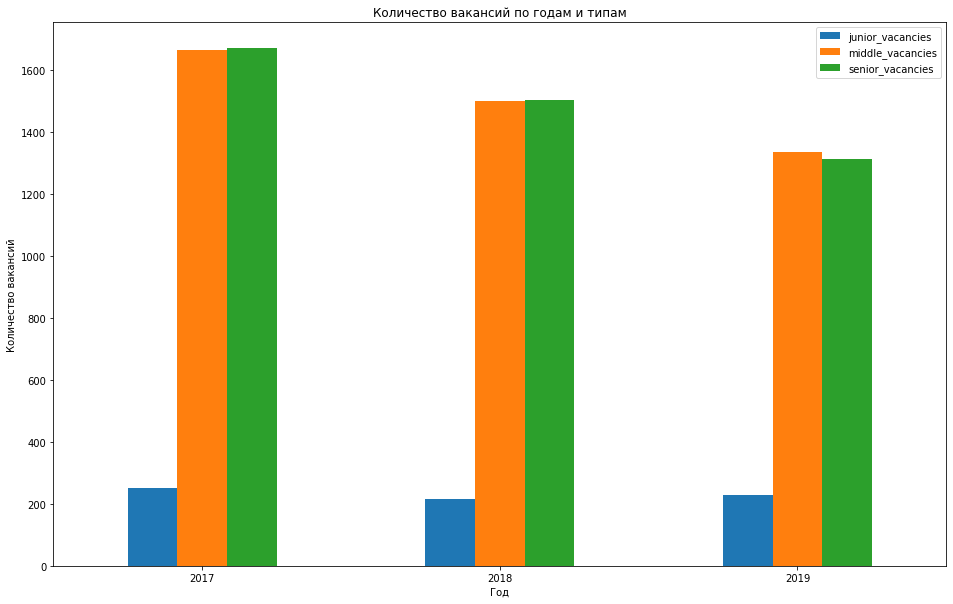

In [66]:
# Построим график динамики количества вакансий по годам
total_vacancies_by_year.plot(kind = 'bar', rot = 0, title = 'Количество вакансий по годам и типам', 
                      figsize = (16, 10))
plt.xlabel('Год')
plt.ylabel('Количество вакансий')
plt.show()

Как уже было отмечено ранее все три сегмента вакансий (джуны, мидлы, сениоры) показывают отрицательную динамику по годам.

In [67]:
total_vacancies_by_year

,junior_vacancies,middle_vacancies,senior_vacancies
year,,,
2017,252,1663,1670
2018,215,1499,1504
2019,227,1334,1311


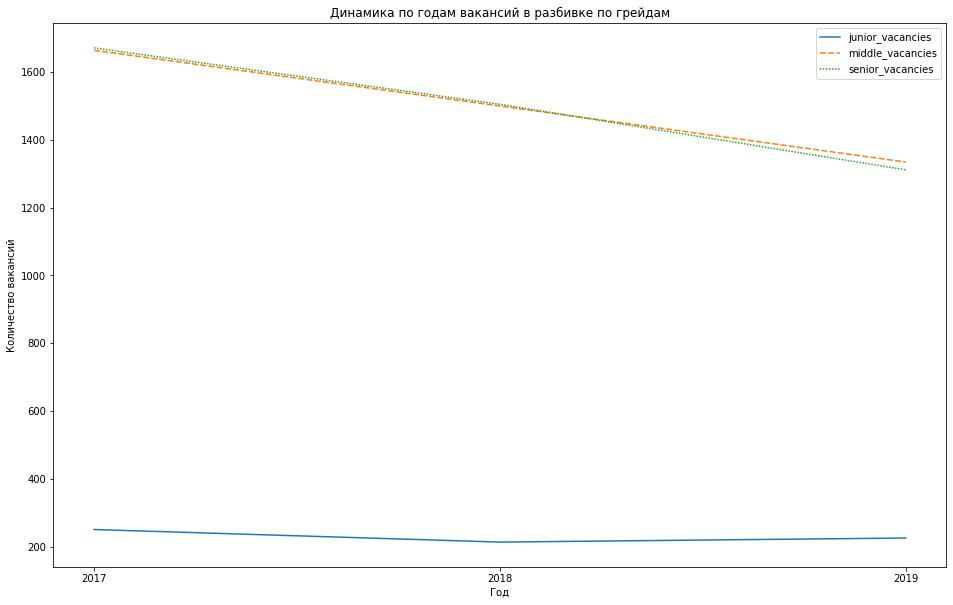

In [68]:
plt.figure(figsize = (16,10))
ax = sns.lineplot(data = total_vacancies_by_year)
ax.locator_params(integer=True)

plt.title('Динамика по годам вакансий в разбивке по грейдам')
plt.xlabel('Год')
plt.ylabel('Количество вакансий')
plt.show()

Количество вакансий мидлов и сениоров снижалось в последние три года, джуны оставались стабильно на низком уровне.

### В каком сегменте компаний наиболее востребованы начинающие специалисты?

In [69]:
# Поработаем со столбцом описания вакансии
vacancies['vacancy_description']

0       <p>We are looking for an experienced Project M...
1       <p>Adform provides a digital advertising solut...
2       <p>Paymentwall is the San Francisco-based glob...
3       <p>Сpa-партнерская сеть, которая занимается по...
4       <p>​​​​​​The Senior Project Manager will be re...
                              ...                        
9685    <p>Наша компания является самым крупным в Росс...
9686    <p><strong>ЭР-Телеком — ведущий независимый оп...
9687    <p>Наша компания является одним из лидеров зак...
9688    <p><strong>ООО «СинхроТел»</strong> занимает л...
9689    <p>Мы — IT-интегратор, разрабатываем В2В, нети...
Name: vacancy_description, Length: 9690, dtype: object

In [70]:
# Уберем лишние символы в начале и конце строки
#vacancies['vacancy_description'] = vacancies['vacancy_description'].map(lambda x: x.lstrip('<p>').rstrip('</p>'))

In [71]:
# Создадим функцию очистки текста от тегов
def tags_clear(data):
    clear_data = BeautifulSoup(data).text
    return clear_data

In [72]:
# Применим функцию с столбцу 'vacancy_description'
it_vacancies['vacancy_description'] = it_vacancies['vacancy_description'].apply(tags_clear)

In [73]:
it_vacancies['vacancy_description']

0       We are looking for an experienced Project Mana...
1       Adform provides a digital advertising solution...
2       Paymentwall is the San Francisco-based global ...
3       Сpa-партнерская сеть, которая занимается полны...
4       ​​​​​​The Senior Project Manager will be respo...
                              ...                        
9685    Наша компания является самым крупным в России ...
9686    ЭР-Телеком — ведущий независимый оператор теле...
9687    Наша компания является одним из лидеров заказн...
9688    ООО «СинхроТел» занимает лидирующие позиции в ...
9689    Мы — IT-интегратор, разрабатываем В2В, нетипов...
Name: vacancy_description, Length: 9675, dtype: object

In [74]:
# Приведем все к нижнему регистру
it_vacancies['vacancy_description'] = it_vacancies['vacancy_description'].str.lower()

In [75]:
# На всякий случай проверим на пропуски
list_of_companies = it_vacancies['vacancy_description']
good_list_of_companies = list_of_companies[list_of_companies != '[None]']
good_list_of_companies

0       we are looking for an experienced project mana...
1       adform provides a digital advertising solution...
2       paymentwall is the san francisco-based global ...
3       сpa-партнерская сеть, которая занимается полны...
4       ​​​​​​the senior project manager will be respo...
                              ...                        
9685    наша компания является самым крупным в россии ...
9686    эр-телеком — ведущий независимый оператор теле...
9687    наша компания является одним из лидеров заказн...
9688    ооо «синхротел» занимает лидирующие позиции в ...
9689    мы — it-интегратор, разрабатываем в2в, нетипов...
Name: vacancy_description, Length: 9675, dtype: object

In [76]:
# Проведем лемматизацию (занимает какое-то время)
text_string_1 = good_list_of_companies.str.cat(sep = ',')
lemmas1 = m.lemmatize(text_string_1)

In [77]:
# Посчитаем самые часто встречающиеся леммы
c = Counter(lemmas1)
c.most_common()

[(' ', 1651562),
 (', ', 144873),
 ('.', 90054),
 ('и', 89414),
 ('; ', 59953),
 ('в', 59090),
 ('проект', 41494),
 ('работа', 34228),
 ('с', 32092),
 ('-', 29060),
 (' (', 26486),
 ('по', 24516),
 (':  ', 23226),
 ('на', 23111),
 ('опыт', 21023),
 ('and', 16751),
 ('компания', 13665),
 ('разработка', 13188),
 ('команда', 13107),
 ('мы', 13045),
 ('управление', 12794),
 ('  ', 12654),
 ('   ', 12601),
 (': ', 12137),
 ('для', 11383),
 ('требование', 11046),
 ('задача', 10493),
 ('знание', 10169),
 ('от', 10131),
 ('/', 9722),
 ('the', 9159),
 (' - ', 9085),
 ('контроль', 8986),
 (') ', 8656),
 ('система', 8516),
 ('project', 8191),
 ('технический', 7962),
 ('of', 7870),
 ('условие', 7570),
 ('to', 7311),
 ('процесс', 7156),
 ('умение', 6958),
 ('проектный', 6938),
 ('); ', 6736),
 ('год', 6703),
 ('быть', 6555),
 ('организация', 6539),
 ('заказчик', 6483),
 ('обязанность', 6401),
 ('к', 6285),
 ('офис', 6185),
 ('бизнес', 6178),
 ('клиент', 6112),
 ('решение', 6070),
 ('высокий', 6052)

К сожалению, название и сфера компании не представлена в вакансиях, судить о сфере компании можно только по описанию вакансий.
В основном это компании из сферы it: телеком, разработка, интеграция, интернет-сервисы, аналитика, дизайн, реклама и маркетинг, поставка оборудования.

## 3. Выводы

<b>К сожалению, мы работаем только с данными о вакансиях, данные о количестве резюме по данному направлению заказчик не представил. Поэтому для оценки дефицита вакансий приходится использовать "косвенные улики".</b>

Все вакансии являются вариациями на тему "менеджер проекта".

На рынке требуются в основном опытные специалисты, мидлы и сениоры - примерно поровну (4502 и 4492) джунов требуется совсем немного - 696 или 7,18%.

<b>Портрет вакансии</b>

Для вакансий джунов наиболее востребованы скорее софт-скиллы:
- работа в команде
- ведение переговоров
- деловая переписка
- продажи
- организаторские навыки
- грамотная речь
- коммуникация

Что касается хард-скиллов, они играют меньшую роль и наиболее востребованными являются:
- MS Project
- 1C
- Excel
- Битрикс
- Google Analytics
- HTML

<b>Динамика</b>

Количество вакансий мидлов и сениоров снижалось в последние три года, джуны оставались стабильно на низком уровне. Причина скорее не в насыщении рынка, а отражение ухудшения экономической ситуации в целом.

- Основные вакансии в рассматриваемой сфере расположены в Москве и Санкт-Петербурге
- Количество вакансий в Москве, превышает количество вакансий в Санкт-Петербурге в 3 раза
- В остальных регионах ежегодно публикуется менее 100 вакансий

<b>Занятость</b>

Большинство вакансий для всех грейдов подразумевает полную занятость, далее - проектная работа, совсем мало вакансий с частичной занятостью. Среди вакансий для джунов совсем немного - 13 это стажировка.

- Больше всего вакансий с удаленной работой в Москве - 118, затем в Санкт-Петербурге - 46, на третьем месте Минск - 16.
- Больше всего вакансий на удаленке для мидлов - 183, для сениоров - 133 и совсем мало для джунов - 28. Это понятно, сначала им надо обучиться в офисе.

<b>Сезонность размещения вакансий</b>
- Прослеживается тенденция роста публикаций после декабрьского-январского спада, летом небольшой спад (за исключением 2018 года), затем рост в сентябре, октябре, ноябре.
- Общая тенденция по выбранным городам - рост весной и концу года. Самые активные месяцы - октябрь, ноябрь - это в Российских городах.
- Что касается Минска - январь и декабрь там тоже активные месяцы, что возможно связано с меньшим количеством новогодних праздников в Республике Беларусь.

<b>Дефицит специалистов</b>

За последние пару лет налицо снижение количества вакансий в IT-отрасли по сравнению с прошлым годом (минус 3%) и одновременно увеличение количества резюме, что свидетельствует о том, что дефицита в начинающих специалистах, и в частности руководителей проектов не наблюдается. К тому же мы выяснили, что процент вакансий для джунов руководителей проектов небольшой и составляет чуть больше 7% от всего объема вакансий IT руководителей проектов. Скорее можно предположить, что возможен дефицит мидл и сениор руководителей IT-проектов, что обусловлено поиском высококвалифицированных специалистов с редкой специализацией.

<b>Сферы компаний</b>

Судить о сфере компании можно только по описанию вакансий.
Это компании из сферы it: 
- телеком 
- разработка 
- интеграция
- интернет-сервисы
- аналитика 
- дизайн, реклама и маркетинг
- продажи и поставка оборудования


### Рекомендации для соискателей джунов:

- В связи с малым количеством вакансий джунов, использовать не только сайт с вакансиями, но и другие ресурсы для поиска работы: знакомые, соцсети, обращаться в компании напрямую
- Прокачивать софт-скиллы и востребованные большинством работодателей хард-скиллы: MS Office, MS Project, 1C, Битрикс
- Сконцентрировать поиски на следующих сегментах компаний: телеком, разработка, интернет-сервисы, аналитика